# Deep Learning Model Training and Evaluation


## Import Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding
from keras.utils import to_categorical
import joblib
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

C:\Users\rhyth\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [18]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rhyth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rhyth\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rhyth\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\rhyth\AppData\Roaming\nltk_data...


True

In [3]:
df = pd.read_csv('data.csv', index_col=0)
df

,Headline,Short Description,Author,Category
0,Over 4 Million Americans Roll Up Sleeves For O...,Health experts said it is too early to predict...,"Carla K. Johnson, AP",U.S. NEWS
1,"American Airlines Flyer Charged, Banned For Li...",He was subdued by passengers and crew when he ...,Mary Papenfuss,U.S. NEWS
2,23 Of The Funniest Tweets About Cats And Dogs ...,"""Until you have a dog you don't understand wha...",Elyse Wanshel,COMEDY
3,The Funniest Tweets From Parents This Week (Se...,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,PARENTING
4,Woman Who Called Cops On Black Bird-Watcher Lo...,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,U.S. NEWS
...,...,...,...,...
209522,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,Verizon Wireless and AT&T are already promotin...,"Reuters, Reuters",TECH
209523,Maria Sharapova Stunned By Victoria Azarenka I...,"Afterward, Azarenka, more effusive with the pr...",NaN,SPORTS
209524,"Giants Over Patriots, Jets Over Colts Among M...","Leading up to Super Bowl XLVI, the most talked...",NaN,SPORTS
209525,Aldon Smith Arrested: 49ers Linebacker Busted ...,CORRECTION: An earlier version of this story i...,NaN,SPORTS


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209527 entries, 0 to 209526
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Headline           209521 non-null  object
 1   Short Description  189815 non-null  object
 2   Author             172109 non-null  object
 3   Category           209527 non-null  object
dtypes: object(4)
memory usage: 8.0+ MB


<AxesSubplot:>

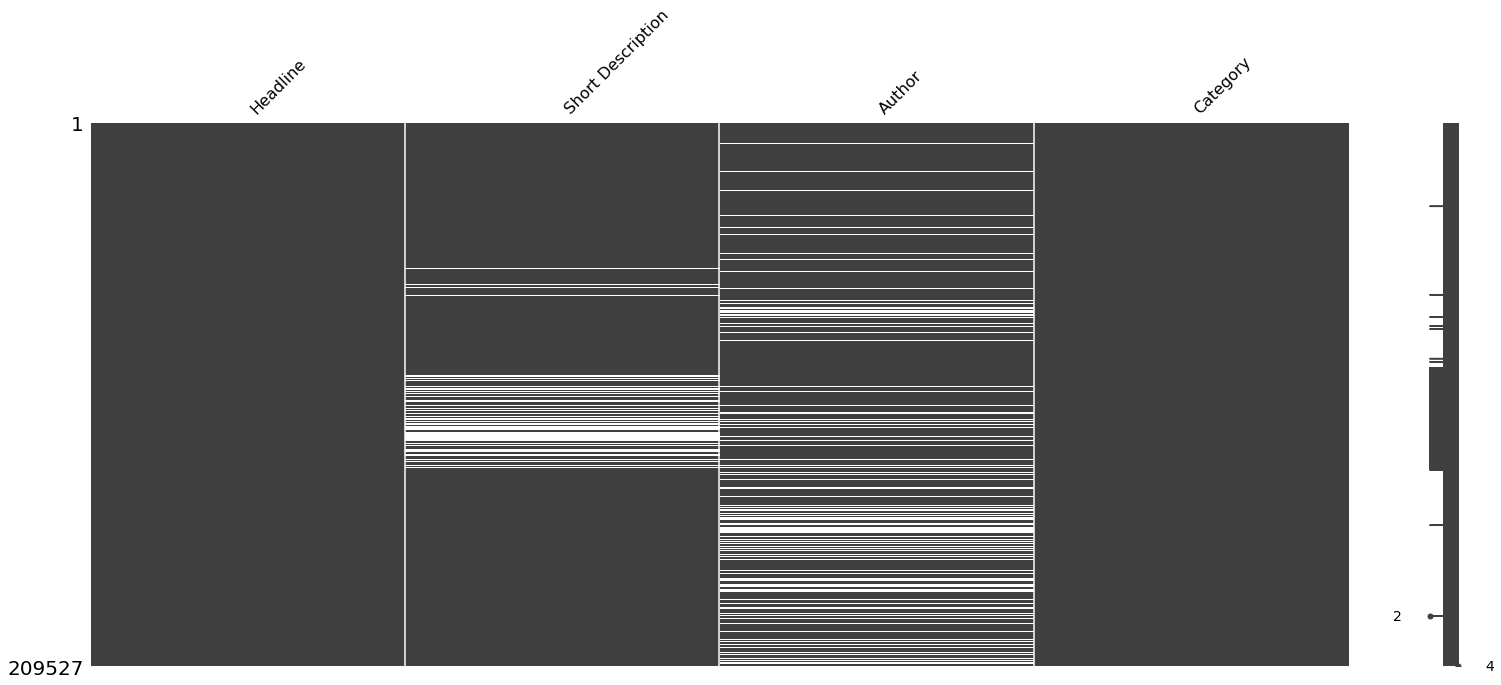

In [5]:
msno.matrix(df)

In [6]:
df1 = df.dropna()
df1

,Headline,Short Description,Author,Category
0,Over 4 Million Americans Roll Up Sleeves For O...,Health experts said it is too early to predict...,"Carla K. Johnson, AP",U.S. NEWS
1,"American Airlines Flyer Charged, Banned For Li...",He was subdued by passengers and crew when he ...,Mary Papenfuss,U.S. NEWS
2,23 Of The Funniest Tweets About Cats And Dogs ...,"""Until you have a dog you don't understand wha...",Elyse Wanshel,COMEDY
3,The Funniest Tweets From Parents This Week (Se...,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,PARENTING
4,Woman Who Called Cops On Black Bird-Watcher Lo...,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,U.S. NEWS
...,...,...,...,...
209517,Good Games -- Is It possible?,I don't think people who play Zynga games are ...,"Mateo Gutierrez, Contributor\nArtist",TECH
209518,Google+ Now Open for Teens With Some Safeguards,"For the most part, teens' experience on Google...","Larry Magid, Contributor\nTechnology journalist",TECH
209519,Web Wars,"These ""Web Wars"" threaten to rage on for some ...","John Giacobbi, Contributor\nTales from the Int...",TECH
209521,Watch The Top 9 YouTube Videos Of The Week,If you're looking to see the most popular YouT...,Catharine Smith,TECH


<AxesSubplot:>

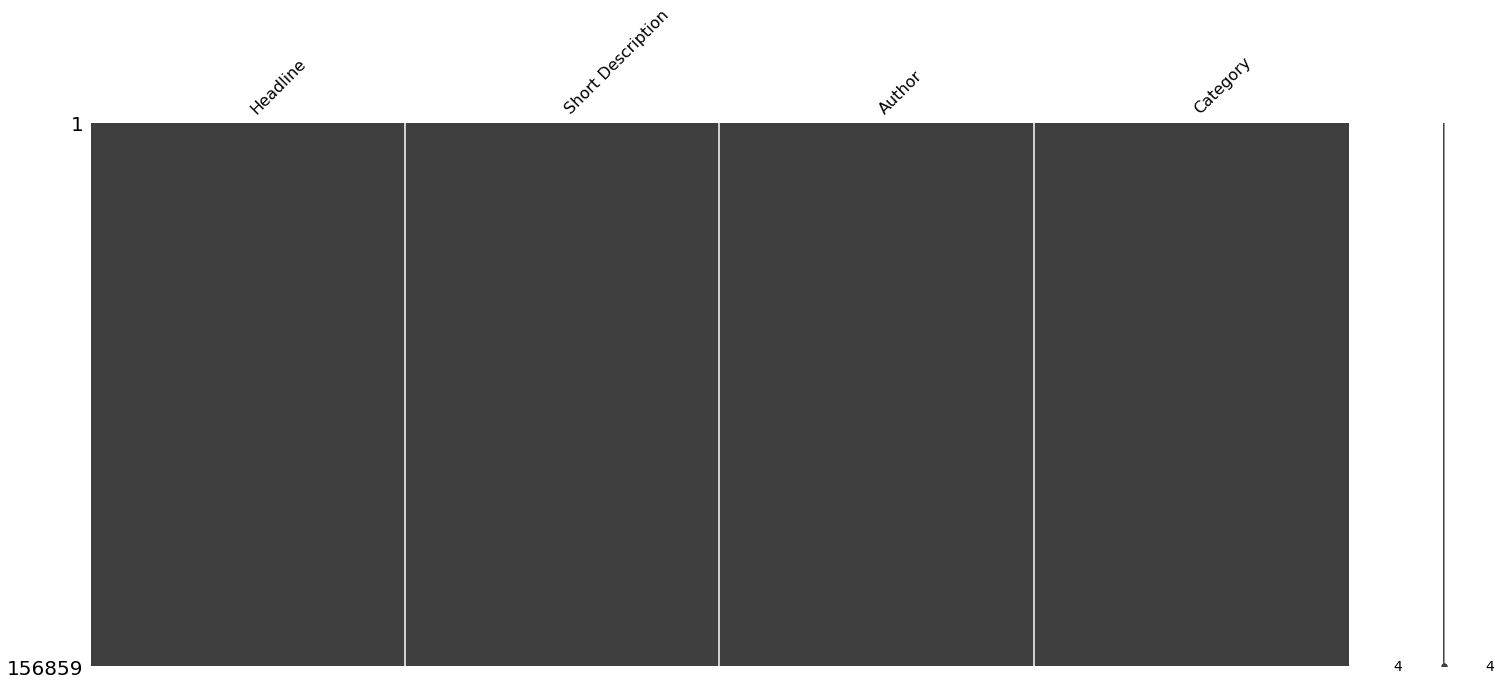

In [7]:
msno.matrix(df1)

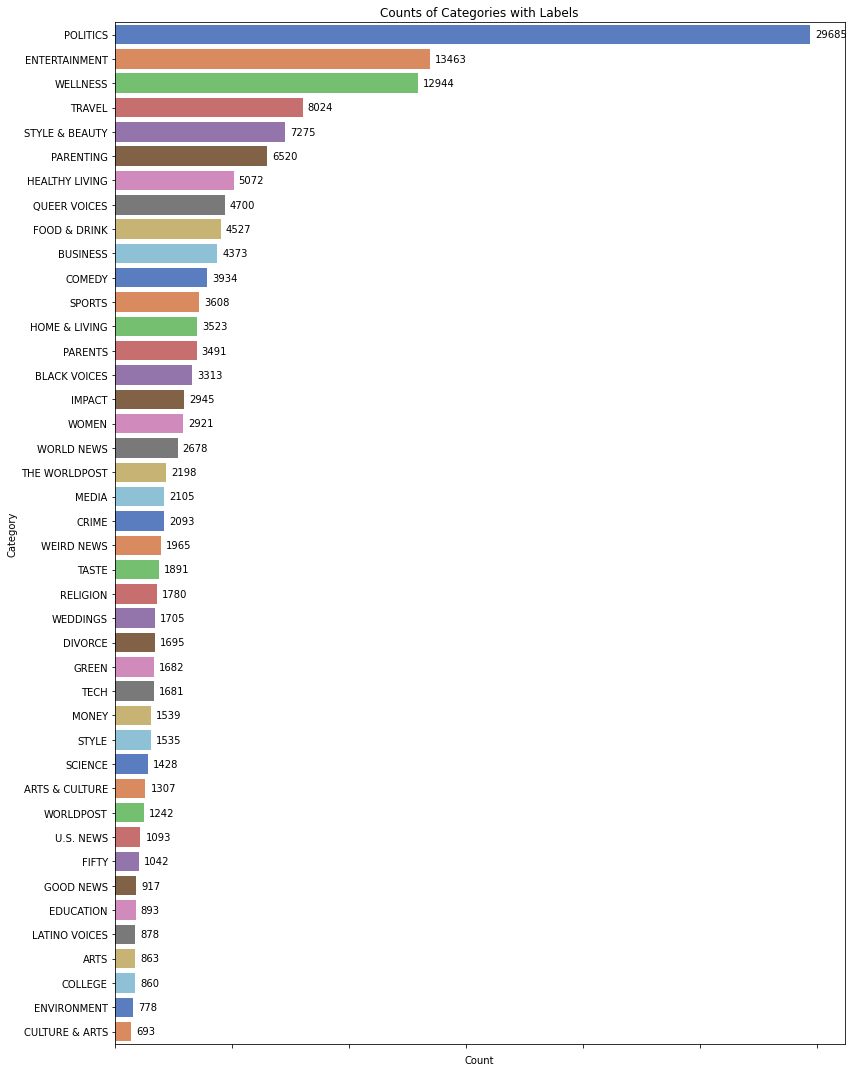

In [8]:
plt.figure(figsize=(12, 15))
ax = sns.countplot(y='Category', data=df1, palette='muted', order=df1['Category'].value_counts().index)

for p in ax.patches:
    ax.annotate(f'{p.get_width()}',
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left',
                va='center',
                xytext=(5, 0),  
                textcoords='offset points')

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.xlabel('Count')
plt.ylabel('Category')
plt.title('Counts of Categories with Labels')

plt.tight_layout()
plt.show()

In [9]:
X = df1.drop('Category', axis=1)  
y = df1['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X_train

,Headline,Short Description,Author
88956,Matt Damon Thinks Jason Bourne Would Definitel...,Those are fightin' words.,Julia Brucculieri
146517,10 Best Solo Escapes This Winter,Traveling alone as an outdoor lover has its ow...,"Fodor's, Contributor\nFodors.com"
157464,"Tomato, Green Bean and Pine Nut Pasta","For more from Maria Rodale, go to www.mariasfa...","Maria Rodale, Contributor\nCEO and Chairman of..."
48996,Jill Stein Is Not Defrauding Recount Donors. B...,"In other words, she is acting like a politician.",Daniel Marans
181124,Pro-Choice to the End: Taking More Control of ...,Even if your state does not (yet) have a POLST...,"Steve Heilig, Contributor\nEthicist, epidemiol..."
...,...,...,...
156559,"Ozzy And Sharon Osbourne's Dining Room, Vintag...",Click through our slideshow to see great color...,Michelle Manetti
133795,"This Year, Conquer Your Fear (of Flying!)","If you have flight anxiety, however severe, ke...","Tracy Christoph, Contributor\nJetBlue Flight A..."
174528,Be in Love With the Way You Eat,The jig is up. There is no one specific eating...,"Marcelle Pick, OB-GYN N.P., Contributor\nCo-fo..."
195844,Stonehenge Erected To Symbolize Ancient Unific...,Is Pearson right? One thing's for sure: this i...,Jacqueline Howard


In [11]:
X_test

,Headline,Short Description,Author
54227,WHO Says All Countries Should Tax Sugary Drink...,A 20 percent tax could reduce the consumption ...,"Stephanie Nebehay, Reuters"
93887,This Fake Town Exists Solely To Test Driverles...,Self-driving vehicles now have a neighborhood ...,Jenny Che
133909,"15 Different, Delicious Ways To Interpret Gree...","Pizza, pasta, grilled cheese... you name it.",Julie R. Thomson
208957,Two Steps to Rebooting Your Resolutions,"Real change can be hard to come by, and it's t...","Heidi Grant Halvorson, Ph.D., Contributor\nAut..."
32968,Georgia State Senator Under Fire For Photo Wit...,"Republican Michael Williams spoke at the ""Marc...",Carla Herreria
...,...,...,...
183223,The Great Cholesterol Myth,"The ""Great Cholesterol Myth"" has been the foun...","Dr. Jonny Bowden, Contributor\nPh.D., C.N.S."
66760,7 Times The NBA Suspended A Player For Doing W...,Let's see if the league gives the Golden State...,Juliet Spies-Gans
142609,Complementary And Alternative Medicine Use Com...,"""This is something that should be discussed op...",Catherine Pearson
136668,An Art Show Dedicated Entirely To Hot Sauce Is...,"Los Angeles Grocery by Patrick Martinez A new,...",Priscilla Frank


In [12]:
y_train.nunique()

42

In [13]:
y_test.nunique()

42

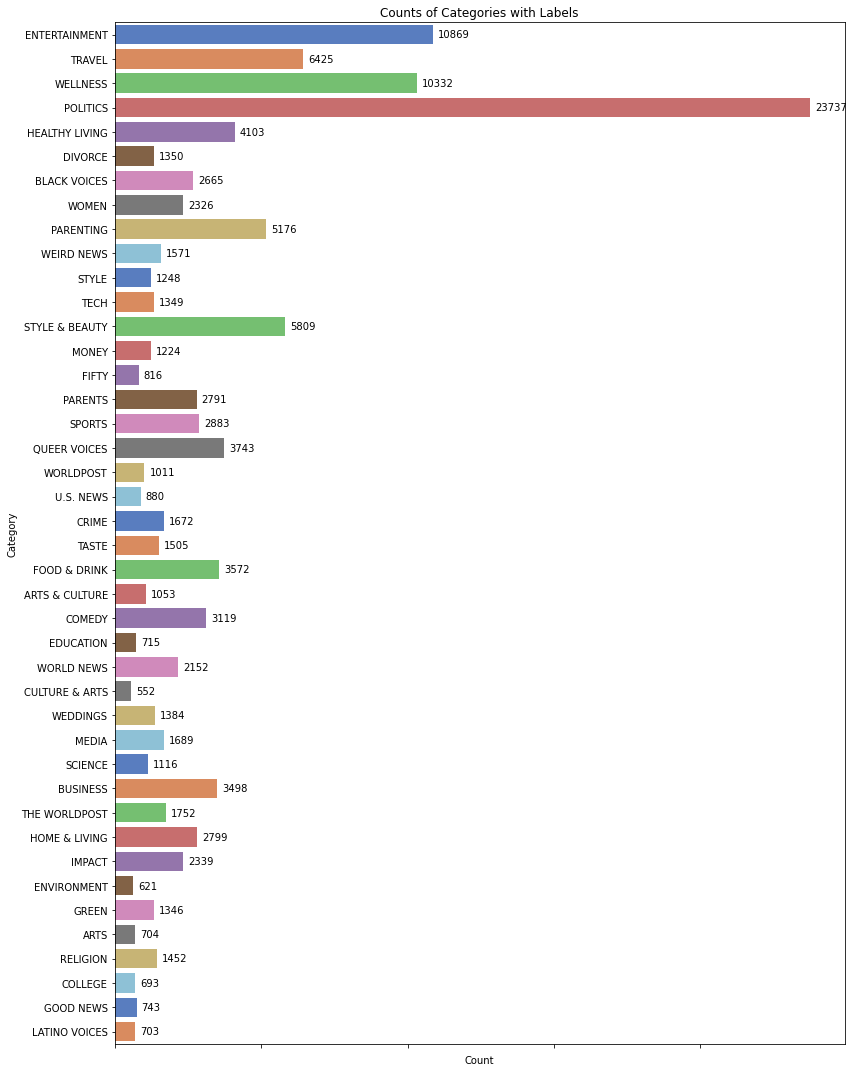

In [14]:
plt.figure(figsize=(12, 15))
ax = sns.countplot(y=y_train, palette='muted')

for p in ax.patches:
    ax.annotate(f'{p.get_width()}',
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left',
                va='center',
                xytext=(5, 0),  
                textcoords='offset points')

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.xlabel('Count')
plt.ylabel('Category')
plt.title('Counts of Categories with Labels')

plt.tight_layout()
plt.show()

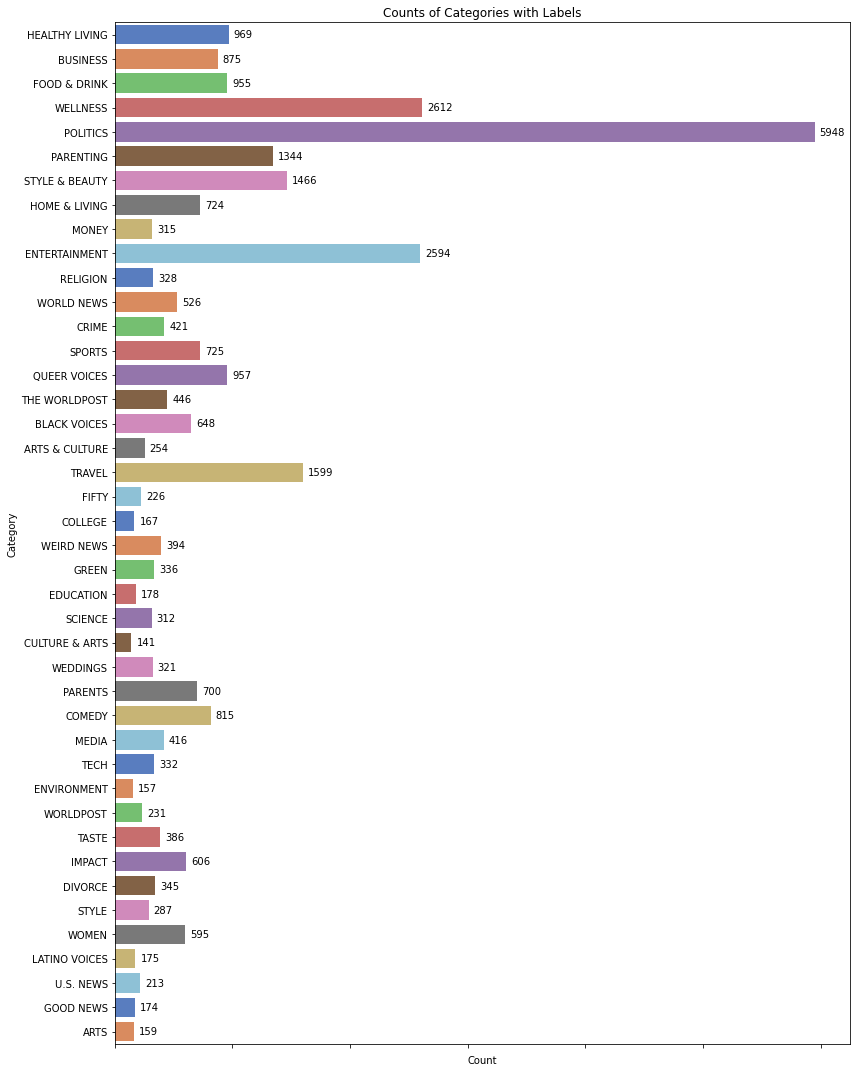

In [15]:
plt.figure(figsize=(12, 15))
ax = sns.countplot(y=y_test, palette='muted')

for p in ax.patches:
    ax.annotate(f'{p.get_width()}',
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left',
                va='center',
                xytext=(5, 0),  
                textcoords='offset points')

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.xlabel('Count')
plt.ylabel('Category')
plt.title('Counts of Categories with Labels')

plt.tight_layout()
plt.show()

## Text Preprocessing

In natural language processing (NLP), text preprocessing is crucial to prepare textual data for machine learning models. This involves several steps like tokenization, stopword removal, and lemmatization.

### Tokenization
Tokenization refers to splitting text into individual words or tokens. It's a fundamental step to convert free-flowing text into a format suitable for analysis.


In [16]:
def preprocess_text(text):
    tokens = nltk.word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    return ' '.join(lemmatized_tokens)

## Stopword Removal
Stopwords are common words (e.g., 'the', 'and', 'is') that often do not carry significant meaning in the context of analysis. Removing them can improve the model's performance by focusing on more meaningful words.

In [19]:
# Combining features and applying text preprocessing
feature_columns = ['Headline', 'Short Description', 'Author']
X_train['combined_features'] = X_train[feature_columns].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
X_test['combined_features'] = X_test[feature_columns].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

X_train['combined_features'] = X_train['combined_features'].apply(preprocess_text)
X_test['combined_features'] = X_test['combined_features'].apply(preprocess_text)

# Label encoding for target variable
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)
num_classes = len(encoder.classes_)

In [20]:
X_train.head()

,Headline,Short Description,Author,combined_features
88956,Matt Damon Thinks Jason Bourne Would Definitel...,Those are fightin' words.,Julia Brucculieri,Matt Damon Thinks Jason Bourne Would Definitel...
146517,10 Best Solo Escapes This Winter,Traveling alone as an outdoor lover has its ow...,"Fodor's, Contributor\nFodors.com",10 Best Solo Escapes This Winter Traveling alo...
157464,"Tomato, Green Bean and Pine Nut Pasta","For more from Maria Rodale, go to www.mariasfa...","Maria Rodale, Contributor\nCEO and Chairman of...","Tomato , Green Bean Pine Nut Pasta For Maria R..."
48996,Jill Stein Is Not Defrauding Recount Donors. B...,"In other words, she is acting like a politician.",Daniel Marans,Jill Stein Is Not Defrauding Recount Donors . ...
181124,Pro-Choice to the End: Taking More Control of ...,Even if your state does not (yet) have a POLST...,"Steve Heilig, Contributor\nEthicist, epidemiol...",Pro-Choice End : Taking More Control Your Fina...


In [21]:
X_test.head()

,Headline,Short Description,Author,combined_features
54227,WHO Says All Countries Should Tax Sugary Drink...,A 20 percent tax could reduce the consumption ...,"Stephanie Nebehay, Reuters",WHO Says All Countries Should Tax Sugary Drink...
93887,This Fake Town Exists Solely To Test Driverles...,Self-driving vehicles now have a neighborhood ...,Jenny Che,This Fake Town Exists Solely To Test Driverles...
133909,"15 Different, Delicious Ways To Interpret Gree...","Pizza, pasta, grilled cheese... you name it.",Julie R. Thomson,"15 Different , Delicious Ways To Interpret Gre..."
208957,Two Steps to Rebooting Your Resolutions,"Real change can be hard to come by, and it's t...","Heidi Grant Halvorson, Ph.D., Contributor\nAut...",Two Steps Rebooting Your Resolutions Real chan...
32968,Georgia State Senator Under Fire For Photo Wit...,"Republican Michael Williams spoke at the ""Marc...",Carla Herreria,Georgia State Senator Under Fire For Photo Wit...


In [22]:
y_train_encoded

array([10, 34, 38, ..., 38, 27, 18])

## Apply Preprocessing to Combined Features
After defining these functions, apply text preprocessing to the combined textual features (e.g., 'Headline', 'Short Description', 'Author') of your dataset.

In [24]:
# Tokenization and Padding
max_vocab_size = 5000
max_sequence_length = 50
embedding_dim = 128
batch_size = 16

tokenizer = Tokenizer(num_words=max_vocab_size)
tokenizer.fit_on_texts(X_train['combined_features'])
X_train_seq = tokenizer.texts_to_sequences(X_train['combined_features'])
X_test_seq = tokenizer.texts_to_sequences(X_test['combined_features'])
X_train_padded = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_sequence_length)


In [25]:
# One-hot encoding for target variable
y_train_categorical = to_categorical(y_train_encoded, num_classes)
y_test_categorical = to_categorical(y_test_encoded, num_classes)


In [27]:
# Saving tokenizer and label encoders
objects_to_save = {
    'tokenizer': tokenizer,
    'target_label_encoder': encoder
}
joblib.dump(objects_to_save, 'tokenizer_label_encoder.joblib')


['tokenizer_label_encoder.joblib']

In [28]:
# Model training for 5 epochs
num_epochs = 5
model5 = Sequential()
model5.add(Embedding(max_vocab_size, embedding_dim, input_length=max_sequence_length))
model5.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model5.add(Dense(num_classes, activation='softmax'))
model5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model5.fit(X_train_padded, y_train_categorical, epochs=num_epochs, batch_size=batch_size)
loss, accuracy = model5.evaluate(X_test_padded, y_test_categorical)
print(f'Test Accuracy: {accuracy * 100:.2f}%')
model5.save('my_model5.h5')




Epoch 1/5


7843/7843 [==============================] - 383s 48ms/step - loss: 1.3462 - accuracy: 0.6368
Epoch 2/5
7843/7843 [==============================] - 403s 51ms/step - loss: 0.8724 - accuracy: 0.7493
Epoch 3/5
7843/7843 [==============================] - 401s 51ms/step - loss: 0.7355 - accuracy: 0.7835
Epoch 4/5
7843/7843 [==============================] - 375s 48ms/step - loss: 0.6373 - accuracy: 0.8090
Epoch 5/5
981/981 [==============================] - 9s 9ms/step - loss: 0.9282 - accuracy: 0.7469
Test Accuracy: 74.69%


In [29]:
# Model training for 10 epochs
num_epochs = 10
model10 = Sequential()
model10.add(Embedding(max_vocab_size, embedding_dim, input_length=max_sequence_length))
model10.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model10.add(Dense(num_classes, activation='softmax'))
model10.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model10.fit(X_train_padded, y_train_categorical, epochs=num_epochs, batch_size=batch_size)
loss, accuracy = model10.evaluate(X_test_padded, y_test_categorical)
print(f'Test Accuracy: {accuracy * 100:.2f}%')
model10.save('my_model10.h5')


Epoch 1/10
7843/7843 [==============================] - 378s 48ms/step - loss: 1.3350 - accuracy: 0.6400
Epoch 2/10
7843/7843 [==============================] - 377s 48ms/step - loss: 0.8644 - accuracy: 0.7504
Epoch 3/10
7843/7843 [==============================] - 372s 47ms/step - loss: 0.7251 - accuracy: 0.7856
Epoch 4/10
7843/7843 [==============================] - 374s 48ms/step - loss: 0.6283 - accuracy: 0.8111
Epoch 5/10
7843/7843 [==============================] - 374s 48ms/step - loss: 0.5509 - accuracy: 0.8310
Epoch 6/10
7843/7843 [==============================] - 374s 48ms/step - loss: 0.4906 - accuracy: 0.8480
Epoch 7/10
7843/7843 [==============================] - 374s 48ms/step - loss: 0.4394 - accuracy: 0.8619
Epoch 8/10
7843/7843 [==============================] - 378s 48ms/step - loss: 0.3972 - accuracy: 0.8733
Epoch 9/10
7843/7843 [==============================] - 374s 48ms/step - loss: 0.3644 - accuracy: 0.8829
Epoch 10/10
981/981 [==============================] - 

In [30]:
# Model training for 20 epochs
num_epochs = 20
model20 = Sequential()
model20.add(Embedding(max_vocab_size, embedding_dim, input_length=max_sequence_length))
model20.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model20.add(Dense(num_classes, activation='softmax'))
model20.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model20.fit(X_train_padded, y_train_categorical, epochs=num_epochs, batch_size=batch_size)
loss, accuracy = model20.evaluate(X_test_padded, y_test_categorical)
print(f'Test Accuracy: {accuracy * 100:.2f}%')
model20.save('my_model20.h5')


Epoch 1/20
7843/7843 [==============================] - 380s 48ms/step - loss: 1.3398 - accuracy: 0.6371
Epoch 2/20
7843/7843 [==============================] - 373s 48ms/step - loss: 0.8652 - accuracy: 0.7509
Epoch 3/20
7843/7843 [==============================] - 372s 47ms/step - loss: 0.7282 - accuracy: 0.7846
Epoch 4/20
7843/7843 [==============================] - 373s 48ms/step - loss: 0.6354 - accuracy: 0.8097
Epoch 5/20
7843/7843 [==============================] - 372s 47ms/step - loss: 0.5584 - accuracy: 0.8303
Epoch 6/20
7843/7843 [==============================] - 374s 48ms/step - loss: 0.4938 - accuracy: 0.8477
Epoch 7/20
7843/7843 [==============================] - 374s 48ms/step - loss: 0.4450 - accuracy: 0.8621
Epoch 8/20
7843/7843 [==============================] - 374s 48ms/step - loss: 0.4038 - accuracy: 0.8725
Epoch 9/20
7843/7843 [==============================] - 373s 48ms/step - loss: 0.3660 - accuracy: 0.8838
Epoch 10/20
7843/7843 [==============================] 

In [31]:
# Model training for 30 epochs
num_epochs = 30
model30 = Sequential()
model30.add(Embedding(max_vocab_size, embedding_dim, input_length=max_sequence_length))
model30.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model30.add(Dense(num_classes, activation='softmax'))
model30.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model30.fit(X_train_padded, y_train_categorical, epochs=num_epochs, batch_size=batch_size)
loss, accuracy = model30.evaluate(X_test_padded, y_test_categorical)
print(f'Test Accuracy: {accuracy * 100:.2f}%')
model30.save('my_model30.h5')


Epoch 1/30
7843/7843 [==============================] - 370s 47ms/step - loss: 1.3403 - accuracy: 0.6376
Epoch 2/30
7843/7843 [==============================] - 365s 47ms/step - loss: 0.8673 - accuracy: 0.7496
Epoch 3/30
7843/7843 [==============================] - 368s 47ms/step - loss: 0.7314 - accuracy: 0.7834
Epoch 4/30
7843/7843 [==============================] - 365s 47ms/step - loss: 0.6370 - accuracy: 0.8085
Epoch 5/30
7843/7843 [==============================] - 366s 47ms/step - loss: 0.5601 - accuracy: 0.8290
Epoch 6/30
7843/7843 [==============================] - 366s 47ms/step - loss: 0.4953 - accuracy: 0.8473
Epoch 7/30
7843/7843 [==============================] - 366s 47ms/step - loss: 0.4433 - accuracy: 0.8616
Epoch 8/30
7843/7843 [==============================] - 366s 47ms/step - loss: 0.4020 - accuracy: 0.8730
Epoch 9/30
7843/7843 [==============================] - 367s 47ms/step - loss: 0.3705 - accuracy: 0.8815
Epoch 10/30
7843/7843 [==============================] 

In [32]:
# Model training for 40 epochs
num_epochs = 40
model40 = Sequential()
model40.add(Embedding(max_vocab_size, embedding_dim, input_length=max_sequence_length))
model40.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model40.add(Dense(num_classes, activation='softmax'))
model40.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model40.fit(X_train_padded, y_train_categorical, epochs=num_epochs, batch_size=batch_size)
loss, accuracy = model40.evaluate(X_test_padded, y_test_categorical)
print(f'Test Accuracy: {accuracy * 100:.2f}%')
model40.save('my_model40.h5')


Epoch 1/40
7843/7843 [==============================] - 360s 46ms/step - loss: 1.3434 - accuracy: 0.6366
Epoch 2/40
7843/7843 [==============================] - 357s 45ms/step - loss: 0.8696 - accuracy: 0.7503
Epoch 3/40
7843/7843 [==============================] - 357s 46ms/step - loss: 0.7339 - accuracy: 0.7833
Epoch 4/40
7843/7843 [==============================] - 362s 46ms/step - loss: 0.6358 - accuracy: 0.8084
Epoch 5/40
7843/7843 [==============================] - 359s 46ms/step - loss: 0.5596 - accuracy: 0.8299
Epoch 6/40
7843/7843 [==============================] - 363s 46ms/step - loss: 0.4961 - accuracy: 0.8477
Epoch 7/40
7843/7843 [==============================] - 362s 46ms/step - loss: 0.4462 - accuracy: 0.8610
Epoch 8/40
7843/7843 [==============================] - 360s 46ms/step - loss: 0.4050 - accuracy: 0.8713
Epoch 9/40
7843/7843 [==============================] - 360s 46ms/step - loss: 0.3715 - accuracy: 0.8814
Epoch 10/40
7843/7843 [==============================] 